<a href="https://colab.research.google.com/github/MohammedRSaad/Osteoporosis-indecator/blob/main/code/Copy_of_MLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [4]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# **Importing the data**

In [ ]:
body_measures = pd.read_csv("https://github.com/MohammedRSaad/Osteoporosis-indecator/raw/main/Data/CSV/Body%20Measures%20(BMX_H).csv")
body_measures

In [ ]:
muscle_strength = pd.read_csv("https://github.com/MohammedRSaad/Osteoporosis-indecator/raw/main/Data/CSV/Muscle%20Strength%20-%20Grip%20Test%20(MGX_H).csv")
muscle_strength

In [ ]:
bone_measures = pd.read_csv("https://github.com/MohammedRSaad/Osteoporosis-indecator/raw/main/Data/CSV/Dual-Energy%20X-ray%20Absorptiometry%20-%20Whole%20Body%20(DXX_H).csv")
bone_measures

In [ ]:
demo_data = pd.read_csv("https://github.com/MohammedRSaad/Osteoporosis-indecator/raw/main/Data/CSV/Demographic%20Variables%20and%20Sample%20Weights%20(DEMO_H).csv")
demo_data

# **Data preparation** 

#### Merging data

In [ ]:
datasets = [bone_measures, body_measures, demo_data, muscle_strength]

## setting X & Y

In [ ]:
y = df["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [ ]:
x = df.drop('logS', axis = 1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Splitting data

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


# Model Building

## Linear Regression

In [ ]:

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Training the model

In [ ]:
y_lr_train_pred = lr.predict(x_train)

y_lr_test_pred = lr.predict(x_test)

### Evaluating the Performance 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  1.0075362951093687
LR R2 (Train):  0.7645051774663391
LR MSE (Test):  1.0206953660861033
LR R2 (Test):  0.7891616188563282


In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Training the model

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluating the performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.028228,0.759669,1.407688,0.709223


## Model comparison

In [ ]:
df_models = pd.concat((lr_results, rf_results), axis = 0).reset_index(drop = True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random forest,1.028228,0.759669,1.407688,0.709223


# Data Visualization

## Linear Regression graph

Text(0.5, 0, 'Experimental LogS')

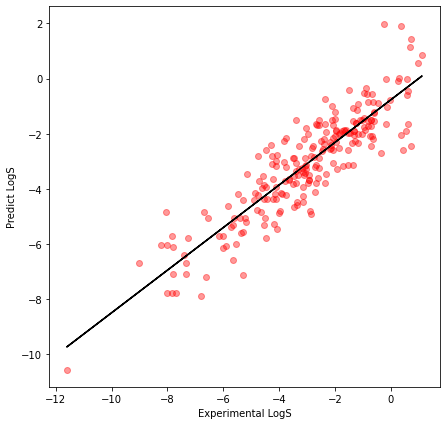

In [ ]:

plt.figure(figsize=(7,7))
plt.scatter(x=y_test, y=y_lr_test_pred, c="#FF0000" ,alpha=0.4)

z = np.polyfit(y_test, y_lr_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#000000')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

## Box Plot graph

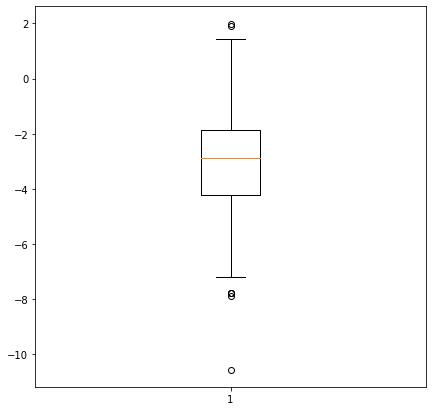

In [ ]:
np.random.seed(10)

data = y_lr_test_pred

fig = plt.figure(figsize =(7, 7))
plt.boxplot(data)
plt.show()

## ***Testing***

In [ ]:
my_value = [[3, 100, 0, .5]]

lr.predict(my_value)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-2.86068571])